Consider a drainage channel made with a single sheet of metal. The channel is open on top and is required to carry the largest amount of water possible. We wish to compute the base width of the channel $b$, as well as the angle $\theta$ at which the sides should be bent upwards in order to maximize the cross-sectional area.  We assume the width of the metal sheet is $W = 3$m, so we require $2a+b=W$.

## Question 1
First, we compute an expression for the cross-sectional area of the channel $A$ as a function of the base length $b$ and the angle at which the sides are bent upwards $\theta$.

We know the vertical height of the cross-section to be $a \sin(\theta)$. Similarly, the area jutting out beneath the bent sides are $a \cos(\theta)$ on both sides. Furthermore, we know $2a+b=3 \implies a = \frac{3 - b}{2}$. 
This gives the total area as 
$$ A(b,\theta) = ab \sin(\theta) + a \sin(\theta)  \cos(\theta)  = a \sin(\theta) \big(b+\cos (\theta) \big) = \frac{1}{2}(3-b) \sin(\theta) \big(b + \cos(\theta) \big)$$


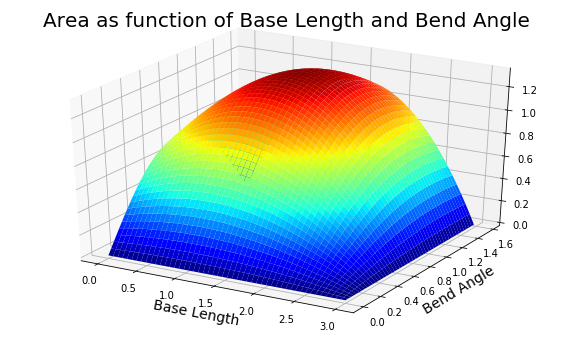

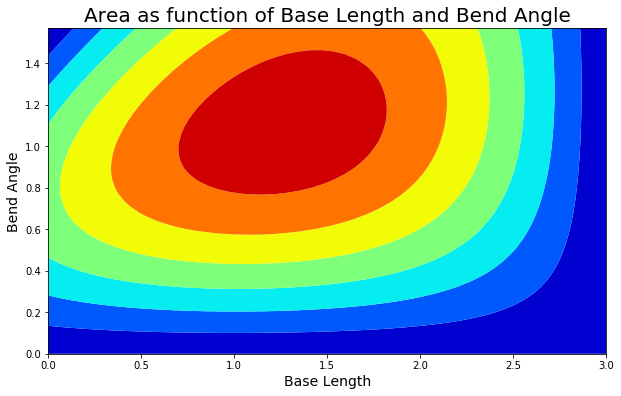

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

b = np.linspace(0, 3)
theta = np.linspace(0, np.pi/2)
b, theta = np.meshgrid(b, theta)

area =  0.5 * (3-b) * np.sin(theta) * (b + np.cos(theta))

fig = plt.figure(figsize = (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(b, theta, area, cmap = plt.cm.jet, linewidth = 0.01, antialiased = True)
plt.title('Area as function of Base Length and Bend Angle', fontsize=20)
plt.xlabel('Base Length', fontsize=14)
plt.ylabel('Bend Angle', fontsize=14)
plt.show()

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
cpf = ax.contourf(b, theta, area, cmap = plt.cm.jet, antialiased = True)
plt.title('Area as function of Base Length and Bend Angle', fontsize=20)
plt.xlabel('Base Length', fontsize=14)
plt.ylabel('Bend Angle', fontsize=14)
plt.show()

From the plot, we see that there is a maximum that is unique over the domain, achieved when $b \approx 1.3$ and $\theta \approx 1.1$.

## Solving for b and $\theta$
We can solve for b and $\theta$ analytically using sympy's solve function.

In [27]:
import sympy as sp
from sympy.tensor.array import derive_by_array
from sympy.solvers import solve

b, theta = sp.symbols('b, theta', real = True)

area =  0.5 * (3-b) * sp.sin(theta) * (b + sp.cos(theta))
grad = np.array(derive_by_array(area, (b,theta)))
for i in solve(grad):
    print(f'b is {i[b]}, theta is {i[theta]}')

b is -1.00000000000000, theta is 0.0
b is 1.27128644612183, theta is -1.09569662638311
b is 1.27128644612183, theta is 1.09569662638311
b is 3.00000000000000, theta is 0.0


In [30]:
from numpy.linalg import norm
from numpy.linalg import inv
from sympy.utilities.lambdify import lambdify

cur_x = [3, 1]

func = lambdify((b,theta), area)
dfunc = lambdify((b,theta), (derive_by_array(area, (b,theta))) )
hess = lambdify((b,theta), derive_by_array(derive_by_array(area, (b,theta)), (b,theta)))

step = 0.01 # step size multiplier
precision = 0.00001
previous_step_size = 1 
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter

while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x
    cur_x -= step * np.array(dfunc(*prev_x))
    previous_step_size = norm(cur_x - prev_x)
    iters += 1
    
print("The local minimum occurs at", cur_x)

The local minimum occurs at [3.02991596 1.00009033]


In [94]:
from numpy.linalg import inv
from sympy.utilities.lambdify import lambdify

b, theta = sp.symbols('b, theta', real = True)

area = 0.5 * (3-b) * sp.sin(theta) * (b + sp.cos(theta))

func = lambdify((b,theta), area)
dfunc = lambdify((b,theta), (derive_by_array(area, (b,theta))) )


def grad(x, max_int):
    iterations = 1
    alpha = 1
    vals = []
    objectfs = []
    
    while iterations <= max_int:
        vals.append(x)
        objectfs.append(func(*x))

        temp = x - alpha * np.array(dfunc(*x))
        if np.abs(func(*temp)-func(*x))>0.01:
            x = temp
        else:
            break
        print(iterations, x, func(*x))
        iterations += 1
        
    return vals, objectfs, iterations
                



grad(start, 50)

NameError: name 'temp' is not defined

In [114]:

def func(x):
    return 0.5 * (3-x[0]) * np.sin(x[1]) * (x[0] + np.cos(x[1]))
    
def dfunc(x):
    return ([(-0.5*x[0] + 1.5)*np.sin(x[1]) + (-0.5*x[0] - 0.5*np.cos(x[1]))*np.sin(x[1]), 
             (-0.5*x[0] + 1.5)*(x[0] + np.cos(x[1]))*np.cos(x[1]) - (-0.5*x[0] + 1.5)*np.sin(x[1])**2]) 

cur_x = np.array([2.5, 0.2])

print(line_search(func, dfunc, cur_x, np.array(dfunc(cur_x)))[0])


None


In [108]:
from numpy.linalg import norm
from scipy.optimize import line_search

cur_x = np.array([1.5, 1.2])

def func(x):
    return 0.5 * (3-x[0]) * np.sin(x[1]) * (x[0] + np.cos(x[1]))
    
def dfunc(x):
    return ([(-0.5*x[0] + 1.5)*np.sin(x[1]) + (-0.5*x[0] - 0.5*np.cos(x[1]))*np.sin(x[1]), 
             (-0.5*x[0] + 1.5)*(x[0] + np.cos(x[1]))*np.cos(x[1]) - (-0.5*x[0] + 1.5)*np.sin(x[1])**2]) 


alpha = 0.01 # step size multiplier
precision = 0.00001
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter

while previous_step_size > precision and iters < max_iters:
    print(f'Iteration {iters}: current x: {cur_x}, current f(x): {func(cur_x)}')
    print(f'Search direction: {dfunc(cur_x)}')

    prev_x = cur_x

    alpha = line_search(func, dfunc, cur_x, np.array(dfunc(cur_x)))[0]
    print(alpha)
    cur_x -= alpha * np.array(dfunc(prev_x))
    previous_step_size = norm(cur_x - prev_x)
    iters += 1
    
print("The local minimum occurs at", cur_x)


Iteration 0: current x: [1.5 1.2], current f(x): 1.3018426644198111
Search direction: [-0.16886579513778777, -0.1453928128696762]
None


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [139]:
help(lambdify((b,theta), (derive_by_array(area, (b,theta))) ))

Help on function _lambdifygenerated:

_lambdifygenerated(b, theta)
    Created with lambdify. Signature:
    
    func(b, theta)
    
    Expression:
    
    [(-0.5*b + 1.5)*sin(theta) + (-0.5*b - 0.5*cos(theta))*sin(theta), (-0.5*b...
    
    Source code:
    
    def _lambdifygenerated(b, theta):
        return ([(-0.5*b + 1.5)*sin(theta) + (-0.5*b - 0.5*cos(theta))*sin(theta), (-0.5*b + 1.5)*(b + cos(theta))*cos(theta) - (-0.5*b + 1.5)*sin(theta)**2])
    
    
    Imported modules:



In [152]:
#print(f'Iteration {iters}: current x: {cur_x}, current f(x): {func(*cur_x)}')
#print(f'Search direction: {dfunc(*cur_x)}')
cur_x = np.array([1.5, 1.2])


area = 0.5 * (3-b) * sp.sin(theta) * (b + sp.cos(theta))
darea = derive_by_array(area, (b,theta))

func = lambdify((b,theta), area)
dfunc = lambdify((b,theta), darea)

curdfunc = dfunc(*cur_x)

newdarea = darea.subs([(b, cur_x[0] + a * curdfunc[0]), (theta, cur_x[1] + a * curdfunc[1])])
#h = func(*(cur_x + alpha* dfunc(*cur_x)))


NameError: name 'a' is not defined

In [175]:
a = sp.symbols('a', real = True)

area = 0.5 * (3-b) * sp.sin(theta) * (b + sp.cos(theta))
print(area)
newarea = area.subs([(b, cur_x[0] + a * curdfunc[0]), (theta, cur_x[1] + a * curdfunc[1])])
print(newarea)

dnewarea = derive_by_array(newarea, a)
solve(dnewarea)

(-0.5*b + 1.5)*(b + cos(theta))*sin(theta)
-(0.0844328975688939*a + 0.75)*(-0.168865795137788*a + cos(0.145392812869676*a - 1.2) + 1.5)*sin(0.145392812869676*a - 1.2)


KeyboardInterrupt: 

In [ ]:
print(solve(dnewarea))

In [134]:
cur_x = np.array([1.5, 1.2])
#(derive_by_array(area, (b,theta)))
print(cur_x)
dfunc(*cur_x)

[1.5 1.2]


[-0.16886579513778777, -0.1453928128696762]